In [ ]:
#### Question 1

In [18]:
import pandas as pd
import numpy as np
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_csv("PVR.csv")
df1["Return"] = (df1["Close Price"].tail(252)).pct_change()
mean_return = df1["Return"].mean()
return_stdev = df1["Return"].std()

annualised_return = round(mean_return * 252 , 2)
annualised_stdev = round(return_stdev * sqrt(252) , 2)
print("Annualised return of the stock(PVR) is : " + str(annualised_return))
print("Annualised volatility of the stock(PVR) is : " + str(annualised_stdev))

Annualised return of the stock(PVR) is : 0.24
Annualised volatility of the stock(PVR) is : 0.33


In [19]:
#### Question 2

In [52]:
import pandas as pd
import numpy as np
data1 = pd.read_csv("PVR.csv")
data2 = pd.read_csv("GAIL.csv")
data3 = pd.read_csv("PNB.csv")
data4 = pd.read_csv("TCS.csv")
data5 = pd.read_csv("TITAN.csv")
data = pd.concat([data1,data2,data3,data4,data5],axis = 1)
new = data["Close Price"]
new.columns = {"PVR","GAIL","PNB","TCS","TITAN"}
data_new = new.dropna()
returns = data_new.pct_change().dropna()
mean_daily_return = returns.mean()
covariance = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(mean_daily_return * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(covariance, weights))) * np.sqrt(252),2)
print("Portpolio return : " + str(portfolio_return))
print("Volatility : " + str(annualised_stdev))

Portpolio return : 0.07
Volatility : 0.33


In [53]:
#### Question 3 and 4

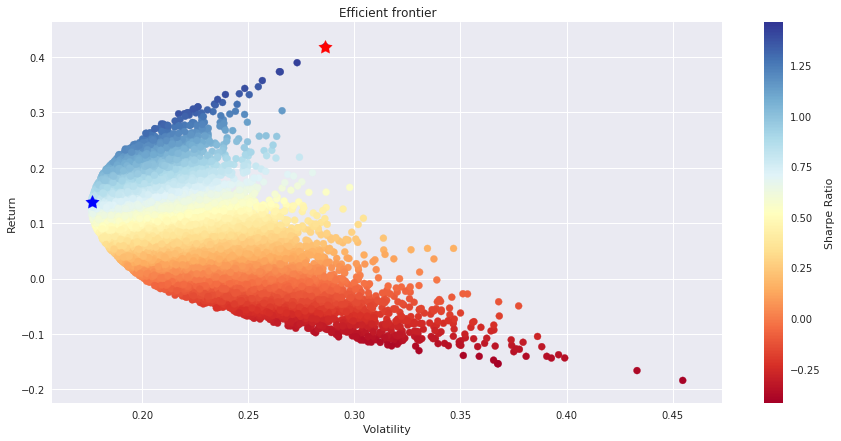

In [47]:
import pandas as pd
import numpy as np
from math import sqrt
data1 = pd.read_csv("PVR.csv")
data2 = pd.read_csv("GAIL.csv")
data3 = pd.read_csv("PNB.csv")
data4 = pd.read_csv("TCS.csv")
data5 = pd.read_csv("TITAN.csv")
data = pd.concat([data1,data2,data3,data4,data5],axis = 1)
new = data["Close Price"]
new.columns = {"PVR","GAIL","PNB","TCS","TITAN"}
data_new = new.dropna()
returns = data_new.pct_change().dropna()
mean_daily_return = returns.mean()
covariance = returns.cov()
num = 25000
pf_returns, pf_volatility, pf_sharpe_ratio, pf_weights = ([] for i in range(4))
for portfolio in range(num):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    returns = np.dot(mean_daily_return , weights) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(covariance,weights))) * sqrt(252)
    sharpe = returns/volatility
    pf_returns.append(returns)
    pf_volatility.append(volatility)
    pf_sharpe_ratio.append(sharpe)
    
portfolio = {'Returns': pf_returns,
             'Volatility': pf_volatility,
             'Sharpe Ratio': pf_sharpe_ratio}
df = pd.DataFrame(portfolio)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,7))
plt.scatter(x = pf_volatility,y = pf_returns , c = pf_sharpe_ratio, cmap="RdYlBu")
plt.colorbar(label = "Sharpe Ratio")
sns.set(style = "darkgrid")
plt.title("Efficient frontier")
plt.xlabel("Volatility")
plt.ylabel("Return")

min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker=(5,1,0), s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue',marker=(5,1,0), s=200 )
plt.show()
